In [1]:
#Dependencies and Set Up
import requests
import json
import pandas as pd
import reverse_geocoder as rg
import matplotlib.pyplot as plt
import numpy as np
from config import gkey
import gmaps

from pprint import pprint
from datetime import datetime as dt

#Path to csv file
earthquake_data_path = '../output_data/EarthquakeData.csv'

#Read the earthquake data
earthquake_data = pd.read_csv(earthquake_data_path,usecols=range(1,14))

In [2]:
#Check the earthquake data
earthquake_data.head()

,id,Latitude,Longitude,Depth,Lat_Lng,Alert,Place,Date,Magnitude,Tsunami,Type,Country,Country_Code
0,us6000d454,-0.7603,-21.1005,10.00,"(-0.7603, -21.1005)",green,central Mid-Atlantic Ridge,2020-12-29 18:34:57.647,5.7,0,earthquake,Ascension,SH
1,us6000d3xn,43.3890,-126.9951,10.00,"(43.389, -126.9951)",green,"212 km W of Bandon, Oregon",2020-12-29 02:10:29.079,5.7,1,earthquake,Oregon,US
2,us6000d3x8,-6.3985,154.6521,23.63,"(-6.3985, 154.6521)",green,"92 km W of Panguna, Papua New Guinea",2020-12-29 01:23:29.769,5.4,0,earthquake,Bougainville,PG
3,us6000d3ln,-0.1917,124.5061,51.77,"(-0.1917, 124.5061)",green,"170 km S of Tomohon, Indonesia",2020-12-28 02:31:11.352,5.1,0,earthquake,North Sulawesi,ID
4,us6000d3kx,14.2272,56.7800,10.00,"(14.2272, 56.78)",green,Owen Fracture Zone region,2020-12-28 00:46:46.797,5.4,0,earthquake,Muhafazat Hadramawt,YE


In [3]:
#Check size of country codes to ensure data is accurate/makes sense
earthquakes_gb_country = earthquake_data.groupby(['Country_Code'])
earthquakes_gb_country.size()

Country_Code
AF    19
AG     2
AL     3
AQ    13
AR    48
      ..
YE    17
YT     2
ZA    32
ZM     1
ZW     2
Length: 118, dtype: int64

In [4]:
#Create Bar Graph
#Group the data by country and # count of ids
bar_graph_data = earthquake_data.groupby(['Country_Code'])['id'].count()
bar_graph_data.sort_values()

Country_Code
TM       1
MN       1
ST       1
ET       1
TC       1
      ... 
PG     299
CL     336
TO     344
ID     438
US    1733
Name: id, Length: 118, dtype: int64

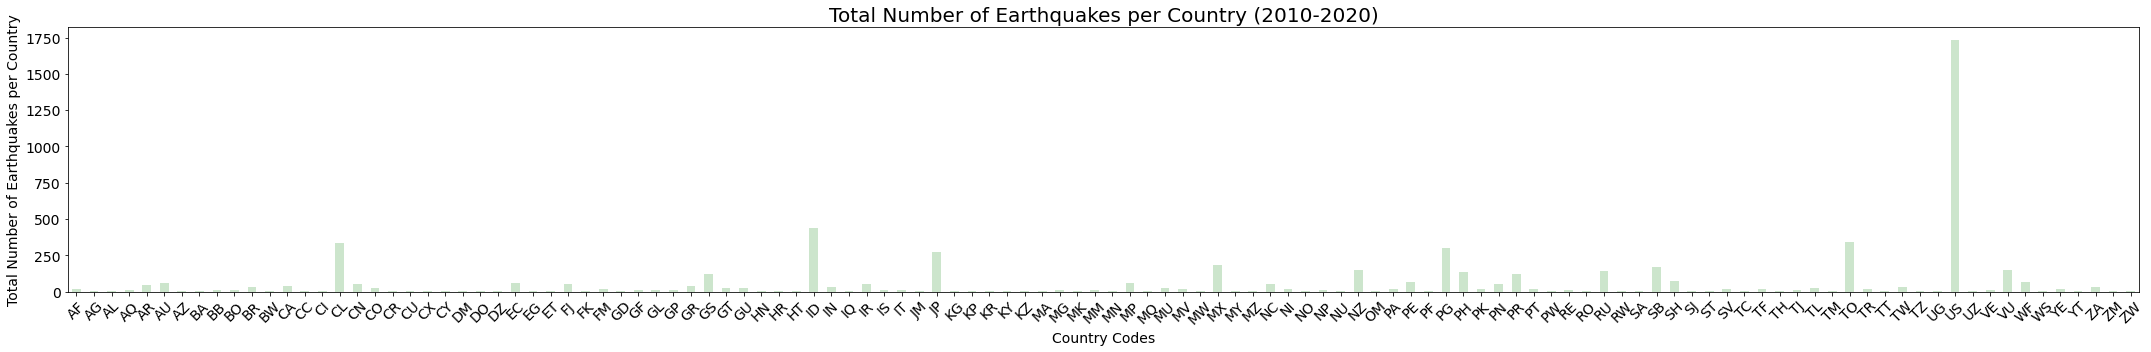

In [5]:
#WILL NOT USE
#Create the bar plot
country_codes_count = bar_graph_data.plot.bar(figsize=(30,5), color='g', alpha=0.2, fontsize=14, rot=45)

#Add required labels
plt.xlabel('Country Codes', fontsize=14)
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14)
plt.title('Total Number of Earthquakes per Country (2010-2020)', fontsize=20)
plt.tight_layout()

In [6]:
#Create a new data frame with just country codes and their total count
#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_code=earthquake_data.groupby(['id','Country_Code'])
code_df=pd.DataFrame(groupby_code.size())

#Create the dataframe with total count of alert levels
country_code=pd.DataFrame(code_df.groupby(['Country_Code']).count())
country_code.columns = ['Total Count']

#Create and format the percentage
country_code['Percentage of Country Code']=(100*(country_code['Total Count']/country_code['Total Count'].sum()))

#Format the "Percentage of Alert Level" column
country_code['Percentage of Country Code']=country_code['Percentage of Country Code']

#Print out DataFrame
country_code

,Total Count,Percentage of Country Code
Country_Code,,
AF,19,0.314153
AG,2,0.033069
AL,3,0.049603
AQ,13,0.214947
AR,48,0.793651
...,...,...
YE,17,0.281085
YT,2,0.033069
ZA,32,0.529101


In [7]:
#Sort the df in descending order
sorted_country_code = country_code.sort_values(by=['Total Count'], ascending=False)
sorted_country_code

,Total Count,Percentage of Country Code
Country_Code,,
US,1733,28.654101
ID,438,7.242063
TO,344,5.687831
CL,336,5.555556
PG,299,4.943783
...,...,...
MW,1,0.016534
MY,1,0.016534
MZ,1,0.016534


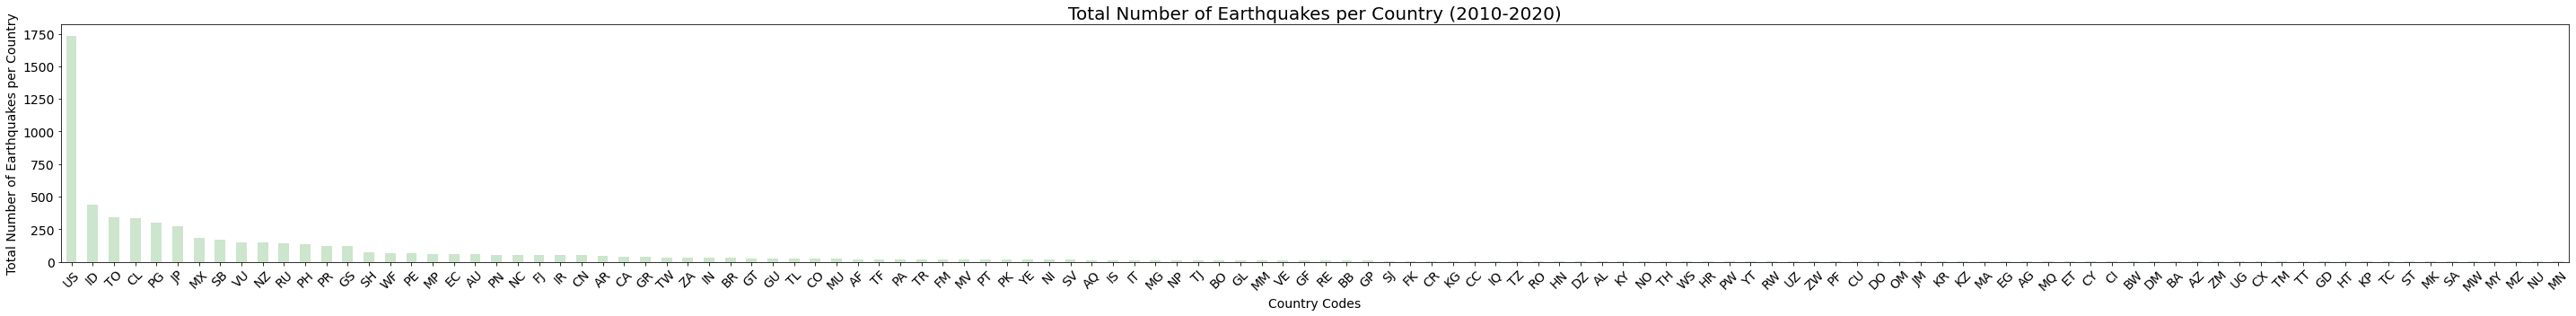

In [32]:
#Create the bar plot
descending_order_plot = sorted_country_code['Total Count'].plot.bar(figsize=(40,5), color='g', alpha=0.2,
                                                                    rot=45, fontsize=14)
#Add required labels
plt.xlabel('Country Codes', fontsize=14)
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14)
plt.title('Total Number of Earthquakes per Country (2010-2020)', fontsize=20)
plt.tight_layout()

#Save plot as an image
plt.savefig("../analysis/CountryCodesVSNumberofEarthquakesBar.png")

In [11]:
#Sort country codes by top and bottom 10 countries to have a better visual
top_10 = sorted_country_code.head(10)
bottom_10 = sorted_country_code.tail(10)

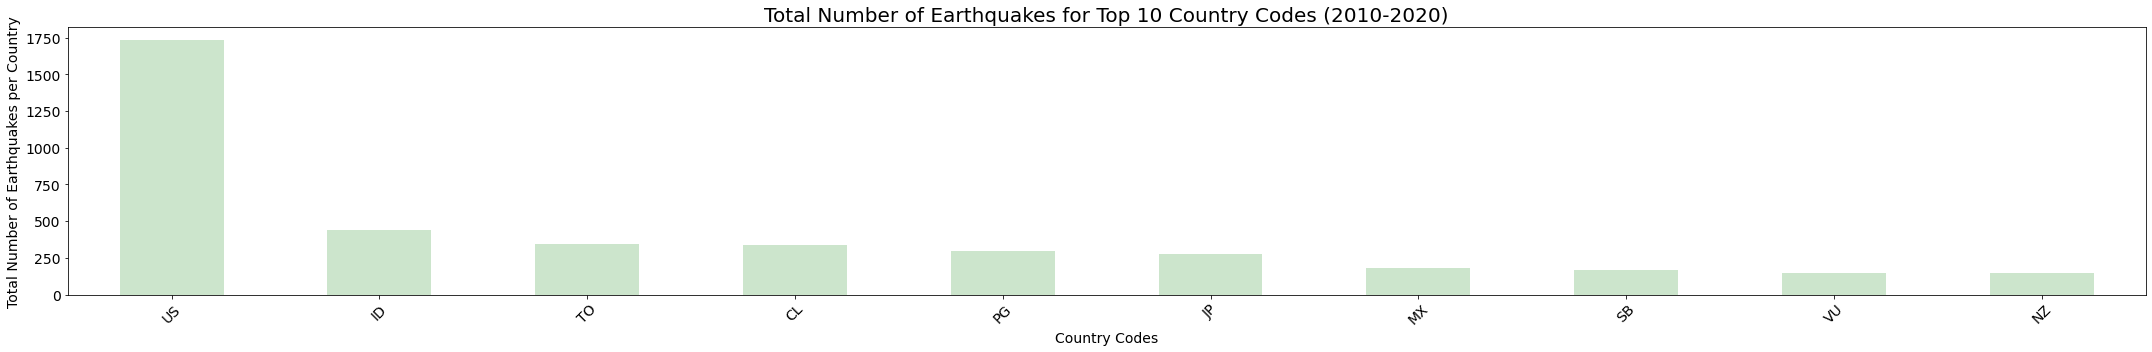

In [33]:
#Create the bar plot
top_10_plot = top_10['Total Count'].plot.bar(figsize=(30,5), color='g', alpha=0.2, fontsize=14, rot=45)

#Add required labels
plt.xlabel('Country Codes', fontsize=14)
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14)
plt.title('Total Number of Earthquakes for Top 10 Country Codes (2010-2020)', fontsize=20)
plt.tight_layout()

#Save plot as an image
plt.savefig("../analysis/CountryCodesVSNumberofEarthquakesTop10Bar.png")

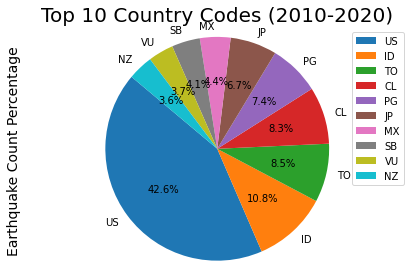

In [13]:
#Create a pie chart
top_10_pie = top_10.plot.pie(y='Total Count', startangle=140, shadow = False, autopct="%1.1f%%")

#Add required labels
plt.title('Top 10 Country Codes (2010-2020)',fontsize = 20)
plt.ylabel("Earthquake Count Percentage", fontsize=14)
plt.axis("equal")

#Print plot
plt.tight_layout()
plt.show()

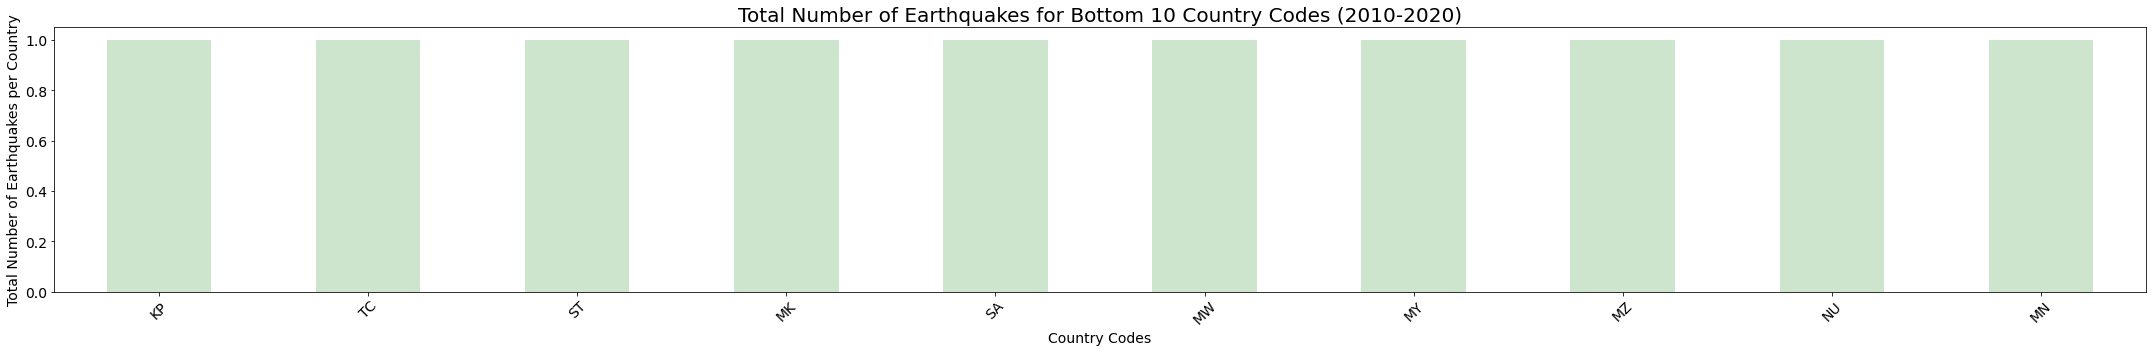

In [14]:
#Create the bar plot for bottom 1-
bottom_10_plot = bottom_10['Total Count'].plot.bar(figsize=(30,5), color='g', alpha=0.2, fontsize=14, rot=45)

#Add required labels
plt.xlabel('Country Codes', fontsize=14)
plt.ylabel('Total Number of Earthquakes per Country', fontsize=14)
plt.title('Total Number of Earthquakes for Bottom 10 Country Codes (2010-2020)', fontsize=20)
plt.tight_layout()

In [16]:
#Groupby alert to analyse the frequency of earthquake per alert type
earthquakes_gb_alert = earthquake_data.groupby(['Alert'])
earthquakes_gb_alert.size()

Alert
green     5852
orange      37
red         16
yellow     144
dtype: int64

In [17]:
earthquakes_gb_alert.count()

,id,Latitude,Longitude,Depth,Lat_Lng,Place,Date,Magnitude,Tsunami,Type,Country,Country_Code
Alert,,,,,,,,,,,,
green,5852,5852,5852,5852,5852,5851,5852,5852,5852,5852,5599,5851
orange,37,37,37,37,37,37,37,37,37,37,36,37
red,16,16,16,16,16,16,16,16,16,16,16,16
yellow,144,144,144,144,144,144,144,144,144,144,143,144


In [18]:
#Generate a pie plot showing the distribution of Alert Levels using Pandas

#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_alert=earthquake_data.groupby(['Alert','id'])
alert_df=pd.DataFrame(groupby_alert.size())

#Create the dataframe with total count of alert levels
alert_level=pd.DataFrame(alert_df.groupby(['Alert']).count())
alert_level.columns = ['Total Count']

#Create and format the percentage
alert_level['Percentage of Alert Level']=(100*(alert_level['Total Count']/alert_level['Total Count'].sum()))

#Format the "Percentage of Alert Level" column
alert_level['Percentage of Alert Level']=alert_level['Percentage of Alert Level']

#Print out DataFrame
alert_level

,Total Count,Percentage of Alert Level
Alert,,
green,5852,96.743263
orange,37,0.611671
red,16,0.264507
yellow,144,2.380559


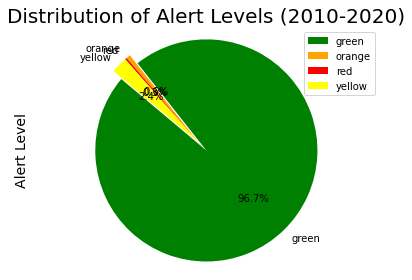

In [19]:
#WILL NOT USE
#Generate a pie plot showing the distribution of female versus male mice us
#Let's make a bar graph
colors = ['green', 'orange','red','yellow']
explode = (0.1,0,0,0)
plot = alert_level.plot.pie(y='Total Count',colors = colors, startangle=140, explode = explode, shadow = False, autopct="%1.1f%%")

#Add required labels
plt.title('Distribution of Alert Levels (2010-2020)',fontsize = 20)
plt.ylabel("Alert Level", fontsize=14)
plt.axis("equal")

#Print plot
plt.tight_layout()
plt.show()

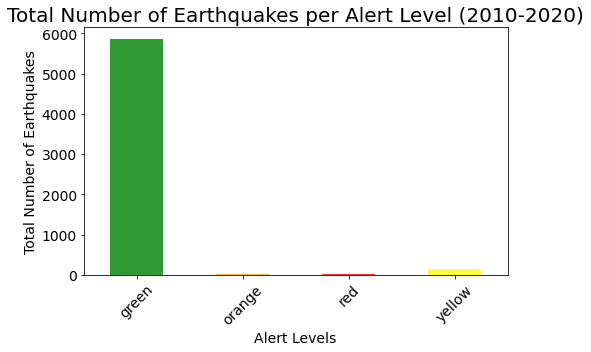

In [34]:
#Create the bar plot
alert_level_plot = alert_level['Total Count'].plot.bar(figsize=(8,5),alpha=0.8, fontsize=14, rot=45,
                                                      color=['green', 'orange', 'red', 'yellow'])
#Add required labels
plt.xlabel('Alert Levels', fontsize=14)
plt.ylabel('Total Number of Earthquakes', fontsize=14)
plt.title('Total Number of Earthquakes per Alert Level (2010-2020)', fontsize=20)
#plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
plt.tight_layout()

#Save plot as an image
plt.savefig("../analysis/AlertLevelVSNumberofEarthquake.png")

In [22]:
#Heatmap
#Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [23]:
# Store 'Lat' and 'Lng' into  locations 
locations = earthquake_data[["Latitude", "Longitude"]].astype(float)

# Convert magnitude to float and store
magnitude_data = earthquake_data["Magnitude"].astype(float)

In [24]:
#Split the data into ids and alert levels and get the number to plot by using the size function
groupby_magnitude=earthquake_data.groupby(['Magnitude','Lat_Lng','Country_Code','Alert'])
mag_df=pd.DataFrame(groupby_magnitude.size())

#Create the dataframe with total count of alert levels
magnitude=pd.DataFrame(mag_df.groupby(['Magnitude','Lat_Lng','Country_Code','Alert']).count())
magnitude.tail(5)

0
Magnitude Lat_Lng              Country_Code Alert    
8.2       (0.802, 92.463)      ID           green   1
          (15.0222, -93.8993)  MX           red     1
8.3       (-31.5729, -71.6744) CL           orange  1
          (54.892, 153.221)    RU           green   1
8.6       (2.327, 93.063)      ID           yellow  1

In [28]:
#Create Heatmap + Marker Location Map for Top 5 Magnitudes
fig = gmaps.figure(map_type='HYBRID')

heat_layer = gmaps.heatmap_layer(locations, weights=magnitude_data, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

top_5_earthquakes = [
    {'Location': (2.327, 93.063), 'Country_Code':'ID', 'Alert_Level':'Yellow', 'Magnitude':(8.6)},
    {'Location': (54.892, 153.221), 'Country_Code':'RU', 'Alert_Level':'Green','Magnitude':(8.3)},
    {'Location': (-31.5729, -71.6744), 'Country_Code':'CL', 'Alert_Level':'Orange','Magnitude':(8.3)},
    {'Location': (15.0222, -93.8993), 'Country_Code':'MX', 'Alert_Level':'Red','Magnitude':(8.2)},
    {'Location': (0.802, 92.463), 'Country_Code':'ID', 'Alert_Level':'Green','Magnitude':(8.2)}
]

eq_locations = [eq['Location'] for eq in top_5_earthquakes]
info_box_template = """
<dl>
<dt>Country Code</dt><dd>{Country_Code}</dd>
<dt>Alert Level</dt><dd>{Alert_Level}</dd>
<dt>Magnitude</dt><dd>{Magnitude}</dd>
</dl>
"""
eq_info = [info_box_template.format(**eq) for eq in top_5_earthquakes]

marker_layer = gmaps.marker_layer(eq_locations, info_box_content=eq_info)
fig.add_layer(marker_layer)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))